In [53]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [54]:
# Load data.
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(io.BytesIO(requests.get(URL).content), index_col=0, skiprows=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [55]:
data_npy = data.to_numpy()
data_bar = data_npy - np.mean(data_npy, axis=0)

In [56]:
# Method 1: use covariance matrix.
cov = (data_bar.T @ data_bar) / (data_bar.shape[0] - 1)
u, sigma, _ = np.linalg.svd(cov)
evals = sigma
idx = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = u[:, idx]

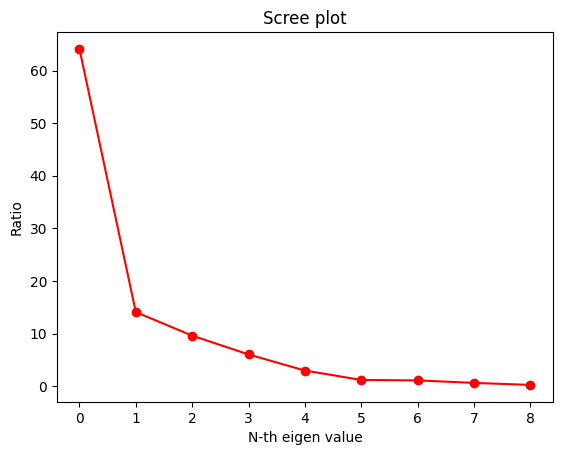

In [57]:
# Scree plot.
fig, ax = plt.subplots()
ax.set_title("Scree plot")
ax.set_xlabel("N-th eigen value")
ax.set_ylabel("Ratio")
ax.plot(range(len(evals)), evals / np.sum(evals) * 100, "ro-")
plt.show()

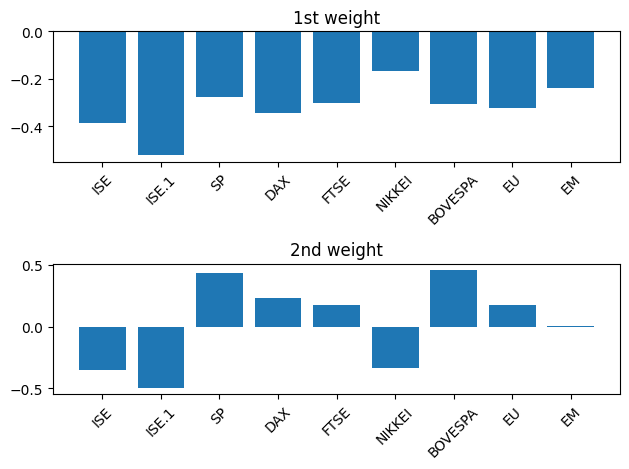

In [58]:
# Weights.
fig, ax = plt.subplots(2, 1)
ax[0].set_title("1st weight")
ax[0].bar(range(evecs[:, 0].shape[0]), evecs[:, 0])
ax[0].set_xticks(range(evecs[:, 0].shape[0]))
ax[0].set_xticklabels(data.columns, rotation=45)
ax[1].set_title("2nd weight")
ax[1].bar(range(evecs[:, 1].shape[0]), evecs[:, 1])
ax[1].set_xticks(range(evecs[:, 1].shape[0]))
ax[1].set_xticklabels(data.columns, rotation=45)
fig.tight_layout()
plt.show()

In [59]:
# Method 2: use original matrix.
_, sigma, vt = np.linalg.svd(data_npy)
evals = sigma**2 / (data_npy.shape[0] - 1)
evecs = vt.T

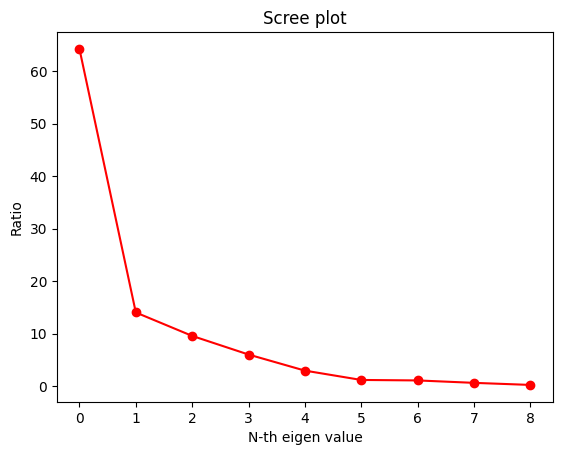

In [60]:
# Scree plot.
fig, ax = plt.subplots()
ax.set_title("Scree plot")
ax.set_xlabel("N-th eigen value")
ax.set_ylabel("Ratio")
ax.plot(range(len(evals)), evals / np.sum(evals) * 100, "ro-")
plt.show()

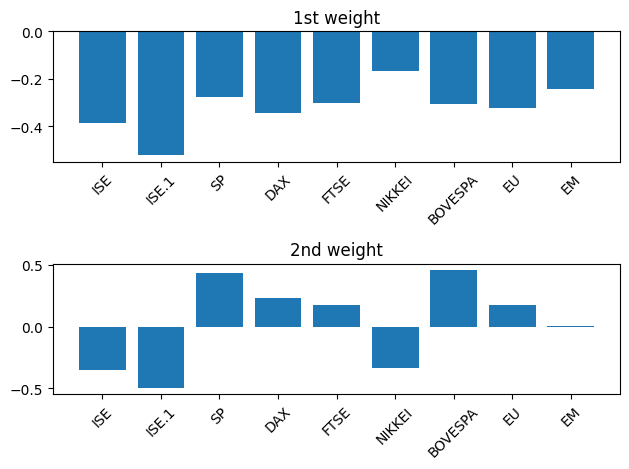

In [61]:
# Weights.
fig, ax = plt.subplots(2, 1)
ax[0].set_title("1st weight")
ax[0].bar(range(evecs[:, 0].shape[0]), evecs[:, 0])
ax[0].set_xticks(range(evecs[:, 0].shape[0]))
ax[0].set_xticklabels(data.columns, rotation=45)
ax[1].set_title("2nd weight")
ax[1].bar(range(evecs[:, 1].shape[0]), evecs[:, 1])
ax[1].set_xticks(range(evecs[:, 1].shape[0]))
ax[1].set_xticklabels(data.columns, rotation=45)
fig.tight_layout()
plt.show()